In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [31]:
df =pd.read_csv('titanic.csv')
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [37]:
df.drop('Cabin',inplace=True,axis=1)

In [39]:
df.fillna(df.mean())

C:\Users\Nithin\AppData\Local\Temp\ipykernel_21656\634187881.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.000000,1,1,C.A. 33112,36.7500,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.000000,0,0,17465,25.9292,S
2,3,"Kilgannon, Mr. Thomas J",male,29.694775,0,0,36865,7.7375,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.000000,2,1,243847,27.0000,S
4,1,"McGough, Mr. James Robert",male,36.000000,0,0,PC 17473,26.2875,S
...,...,...,...,...,...,...,...,...,...
218,3,"Lindqvist, Mr. Eino William",male,20.000000,1,0,STON/O 2. 3101285,7.9250,S
219,1,"Butt, Major. Archibald Willingham",male,45.000000,0,0,113050,26.5500,S
220,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.000000,1,0,PC 17758,108.9000,C
221,3,"Holm, Mr. John Fredrik Alexander",male,43.000000,0,0,C 7075,6.4500,S


In [43]:
df.drop('Name',inplace=True,axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    223 non-null    int64  
 1   Sex       223 non-null    object 
 2   Age       178 non-null    float64
 3   SibSp     223 non-null    int64  
 4   Parch     223 non-null    int64  
 5   Ticket    223 non-null    object 
 6   Fare      223 non-null    float64
 7   Embarked  222 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 14.1+ KB


In [42]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,223.000000,178.000000,223.000000,223.000000,223.000000
mean,2.345291,29.694775,0.506726,0.304933,32.622551
std,0.850047,15.398053,1.169700,0.634108,61.062047
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,19.250000,0.000000,0.000000,7.879200
50%,3.000000,27.000000,0.000000,0.000000,12.475000
75%,3.000000,37.750000,1.000000,0.000000,30.035400
max,3.000000,71.000000,8.000000,2.000000,512.329200


In [49]:
x=df.iloc[:,[0,3]].values
y=df.iloc[:,[4]].values

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [51]:
sc = StandardScaler()

In [52]:
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [56]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\Nithin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [65]:
y_pred=reg.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[43  0  0]
 [ 6  0  1]
 [ 4  0  2]]


In [69]:
from sklearn.metrics import accuracy_score 

print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.8035714285714286


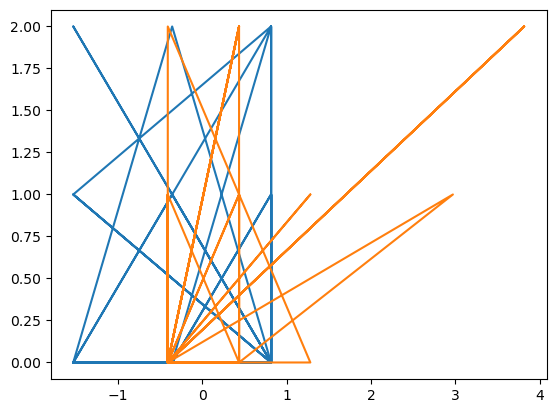

In [77]:
plt.plot(x_test,y_test)
plt.scatter(df[['Fare']])